**Examples**

Nondimensionalization

In [3]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [4]:
from modsim import *

In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap11.py')
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap12.py')
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap13.py')

Downloaded chap11.py
Downloaded chap12.py
Downloaded chap13.py


In [6]:
# import code from previous notebooks
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results
from chap12 import calc_total_infected
from chap13 import sweep_beta
from chap13 import sweep_parameters

Exploring the Results

In [7]:
beta_array = [1.1, 1.2, 1.3, 1.4, 1.5,
              1.6, 1.7, 1.8, 1.9, 2.0 , 2.1]
gamma_array = [1.1, 1.3, 1.5, 1.7]
frame = sweep_parameters(beta_array, gamma_array)

In [8]:
frame.head()

,1.1,1.3,1.5,1.7
Parameter,,,,
1.1,0.134622,0.050054,0.028234,0.019447
1.2,0.230178,0.080464,0.039067,0.025003
1.3,0.335259,0.135332,0.056594,0.032821
1.4,0.432975,0.215581,0.086518,0.044396
1.5,0.519134,0.305678,0.136060,0.062471


In [9]:
for gamma in frame.columns:
    column = frame[gamma]
    for beta in column.index:
        metric = column[beta]
        print(beta, gamma, metric)

1.1 1.1 0.13462244761088482
1.2 1.1 0.2301784629492316
1.3 1.1 0.33525880750239256
1.4 1.1 0.432974541410976
1.5 1.1 0.5191341752159002
1.6 1.1 0.5939334562405293
1.7 1.1 0.6586264443184977
1.8 1.1 0.7145840968661644
1.9 1.1 0.7630445672643806
2.0 1.1 0.8050629730519255
2.1 1.1 0.8415182267098258
1.1 1.3 0.05005361041737755
1.2 1.3 0.08046416285554359
1.3 1.3 0.13533239843044342
1.4 1.3 0.21558116917106074
1.5 1.3 0.3056779152470058
1.6 1.3 0.3929394384227619
1.7 1.3 0.47277298481208996
1.8 1.3 0.5443423444021388
1.9 1.3 0.6080596245833818
2.0 1.3 0.6646820297559546
2.1 1.3 0.7150059244305573
1.1 1.5 0.028234341299951837
1.2 1.5 0.03906724172325571
1.3 1.5 0.056594003352801625
1.4 1.5 0.08651830132451777
1.5 1.5 0.1360602163039364
1.6 1.5 0.20524109101790888
1.7 1.5 0.28374687275894084
1.8 1.5 0.36206009769365644
1.9 1.5 0.43580848086172064
2.0 1.5 0.5036413079357484
2.1 1.5 0.565446093508343
1.1 1.7 0.019446606769010222
1.2 1.7 0.025003087594486106
1.3 1.7 0.032821124531528745
1.4 1.7

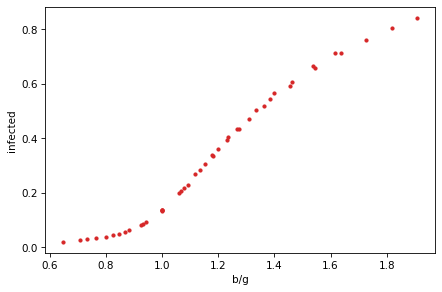

In [10]:
from matplotlib.pyplot import plot
def plot_sweep_frame(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta/gamma, metric, '.', color='C3')
plot_sweep_frame(frame)
decorate(xlabel='b/g',
         ylabel='infected')

Analysis and Simulation

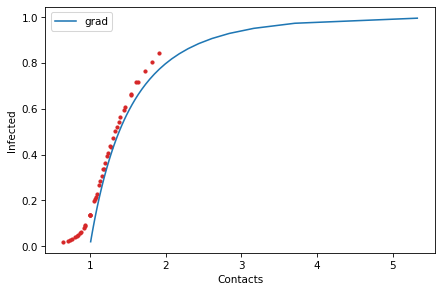

In [11]:
s_inf_array = linspace(0.005, 0.98, 45)
from numpy import log
c_array = log(s_inf_array) / (s_inf_array - 1)
frac_infected = 1 - s_inf_array
frac_infected_series = make_series(c_array, frac_infected)
plot_sweep_frame(frame)
frac_infected_series.plot(label='grad')
decorate(xlabel='Contacts',
         ylabel='Infected')

**Exercises**

Exercise 1

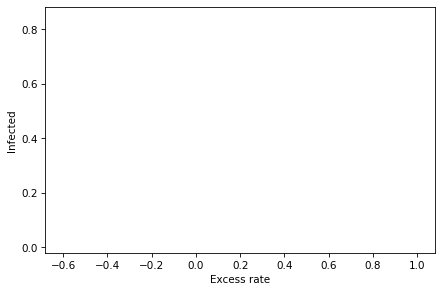

In [12]:
def plot_sweep_frame_difference(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta - gamma, metric, '-', color='C5')
plot_sweep_frame_difference(frame)
decorate(xlabel='Excess rate',
         ylabel='Infected')

Exercise 2

In [13]:
show(frac_infected_series)

,values
index,
5.324942,0.995000
3.706714,0.972841
3.165583,0.950682
2.841477,0.928523
2.613009,0.906364
2.438271,0.884205
2.297827,0.862045
2.181094,0.839886
2.081686,0.817727


Exercise 3

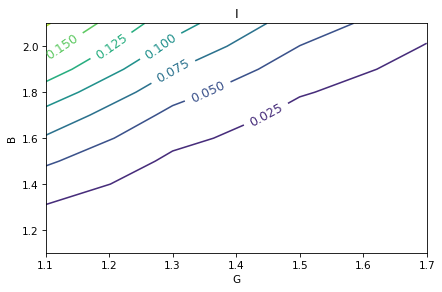

In [14]:
def sweep_beta_max(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = results.i.max()
    return sweep
def sweep_parameters_max(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_max(beta_array, gamma)
    return frame
frame_max = sweep_parameters_max(beta_array, gamma_array)
contour(frame_max)
decorate(xlabel='G',
         ylabel='B',
         title='I')

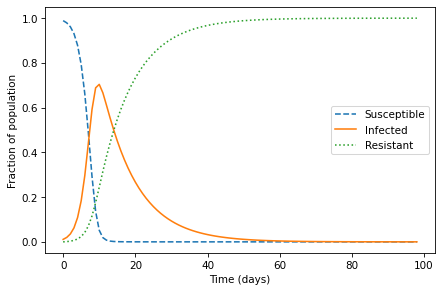

In [15]:
system = make_system(0.9, 0.1)
results = run_simulation(system, update_func)
plot_results(results.s, results.i, results.r)

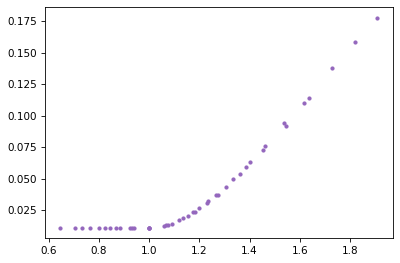

In [16]:
from matplotlib.pyplot import plot
def plot_sweep_frame(frame):
    for gamma in frame.columns:
        series = frame[gamma]
        for beta in series.index:
            metric = series[beta]
            plot(beta/gamma, metric, '.', color='C4')
plot_sweep_frame(frame_max)